### Student details

Student name: ESPINOUX Jules

Student ID: 24267228

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [1]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [2]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [3]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('data//01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

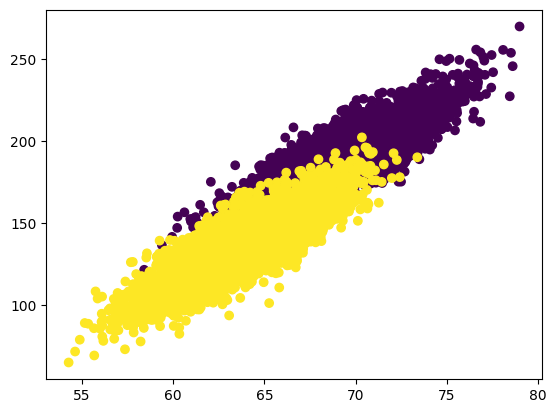

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [5]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [6]:
################################
# Your code here

perceptron = Perceptron()
perceptron.train(X_train, y_train)
y_predicted = perceptron.predict(X_test)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [7]:
################################
# Your code here

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_predicted)

print(score)


0.8545454545454545


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable

Error list: [1228, 940, 907, 897, 866, 852, 833, 870, 847, 842, 827, 839, 849, 829, 835, 831, 864, 848, 836, 846, 840, 857, 834, 827, 831, 834, 855, 847, 840, 837, 842, 848, 831, 821, 846, 866, 831, 844, 836, 829, 835, 831, 864, 839, 839, 849, 829, 835, 827, 870]


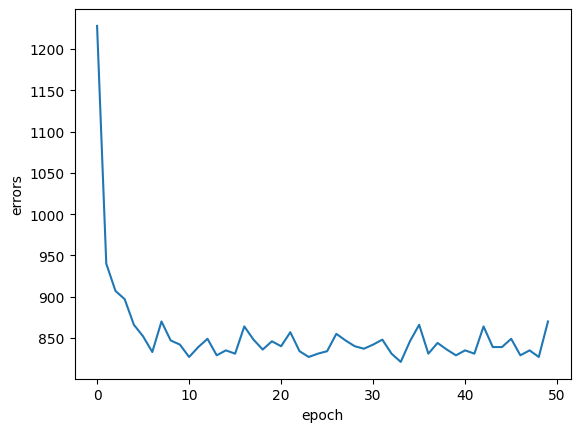

In [8]:
################################
# Your code here

print("Error list: " + str(perceptron.errors_))

plt.plot(np.arange(len(perceptron.errors_)), perceptron.errors_)
plt.xlabel("epoch")
plt.ylabel("errors")
plt.show()


2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

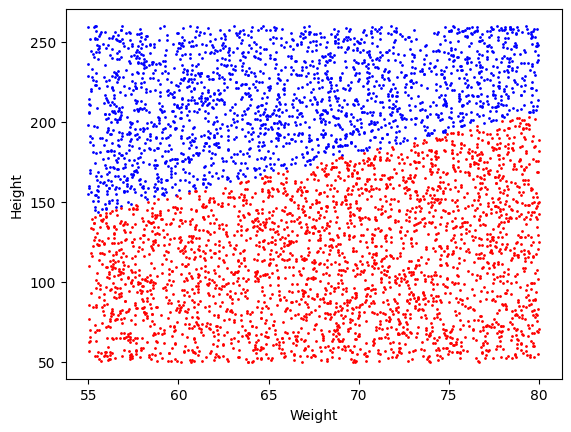

In [9]:
import random
import pandas as pd

heights = [(random.random()*25 + 55) for _ in range(5000)]
weights = [(random.random()*210 + 50) for _ in range(5000)]

X_random = pd.DataFrame({'Height': heights, 'Weight': weights})

Y_random_predicted = perceptron.predict(X_random)

#### Plot of the samples ####

df_predicted = pd.DataFrame({'Height': heights, 'Weight': weights, 'Sex': list(Y_random_predicted)})

males = df_predicted[df_predicted["Sex"] == -1]
females = df_predicted[df_predicted["Sex"] == 1]

plt.scatter(males["Height"], males["Weight"], color="blue", s=1)
plt.scatter(females["Height"], females["Weight"], color="red", s=1)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


*1. The errors decreases at the beginning before reaching a plateau, then it is oscillating around a value without decreasing significantly again.*

*2. No the very best solution is not at the last epoch, it is oscillating around a number of errors.*

*3. There will always be exceptions like people having a weight/height of the other sex.*

New Perceptron class

In [10]:
class PerceptronEE(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, precision_rate): ## the precision rate is added to exit the training once convergence has been achieved

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)

            if self.errors_[-1]/len(X) < precision_rate:
                return self
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)      

Error list: [1228, 940, 907, 897, 866]


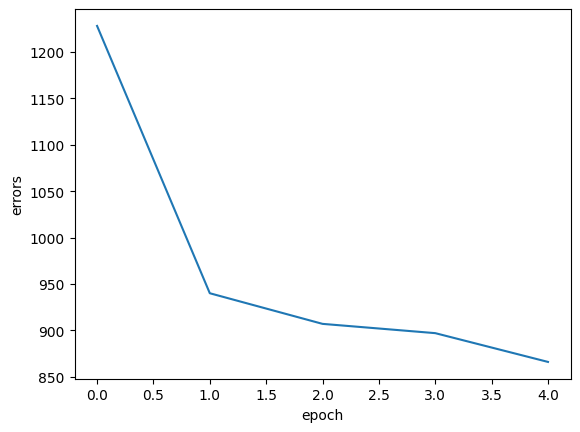

In [11]:
perceptron = PerceptronEE()
perceptron.train(X_train, y_train, 0.13)
y_predicted = perceptron.predict(X_test)

print("Error list: " + str(perceptron.errors_))

plt.plot(np.arange(len(perceptron.errors_)), perceptron.errors_)
plt.xlabel("epoch")
plt.ylabel("errors")
plt.show()